# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

# Fetch data

define company:

In [2]:
company = "INTC"
days_ahead = 1

In [3]:
X_train, X_test = get_lstm_data(company)

In [4]:
X_train.shape

(3773, 1)

In [5]:
X_test.shape

(919, 1)

# Scale data

In [6]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [7]:
X_train_sc.shape

(3773, 1)

In [8]:
X_test_sc.shape

(919, 1)

# Create Sequences

In [9]:
#X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
#X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [10]:
#X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
#X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [11]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [12]:
X_train.shape

(919, 19, 1)

In [13]:
X_test.shape

(205, 19, 1)

In [14]:
y_train.shape

(919,)

In [15]:
y_test.shape

(205,)

In [16]:
y_test_simple

array([30.69074249, 30.35970306, 30.45006371, 31.38977242, 30.50427437,
       30.04346085, 30.47716713, 29.212183  , 27.63998222, 28.19115829,
       28.91400719, 27.83876228, 28.22729492, 29.66396332, 29.30253601,
       29.36578369, 30.19706154, 29.34150887, 29.70554352, 30.16969872,
       30.12418938, 30.86136627, 28.9774704 , 28.98656845, 29.07758141,
       29.20499611, 27.6578331 , 27.33929825, 26.54751015, 27.21188545,
       26.03786278, 26.35639   , 26.43830109, 26.50193024, 26.4927578 ,
       26.02474976, 23.73978615, 26.18993187, 26.17157555, 27.04334831,
       27.26358986, 26.37346077, 26.83229065, 28.64006805, 29.49349022,
       30.05326653, 30.62221336, 31.63163567, 31.30127716, 31.27226257,
       29.94152832, 30.64386177, 31.7528019 , 32.42741013, 32.3350029 ,
       31.66963387, 32.26107025, 32.3442421 , 32.3350029 , 30.56992912,
       30.20027733, 27.53881073, 27.35398674, 28.66624069, 27.75322914,
       26.31755638, 27.47355461, 26.8489399 , 27.58542252, 28.55

In [17]:
len(y_test_simple)

205

In [18]:
X_train

array([[[2.002516 ],
        [1.7691798],
        [1.8086677],
        ...,
        [2.5481634],
        [2.6414995],
        [2.4045734]],

       [[1.7153301],
        [1.9307187],
        [2.1568773],
        ...,
        [2.8317568],
        [2.7527838],
        [2.993299 ]],

       [[2.2358518],
        [2.9250932],
        [2.871249 ],
        ...,
        [3.2088165],
        [3.259105 ],
        [3.018443 ]],

       ...,

       [[2.2425778],
        [2.2670865],
        [2.1966255],
        ...,
        [2.3252146],
        [2.4254417],
        [2.3930602]],

       [[2.2211344],
        [2.066169 ],
        [2.0707936],
        ...,
        [2.3714736],
        [2.3699303],
        [2.348345 ]],

       [[2.0322459],
        [2.0970078],
        [2.1139686],
        ...,
        [2.336007 ],
        [2.336007 ],
        [2.3884346]]], dtype=float32)

# Create model

In [19]:
model = Sequential()
#model.add(LSTM(units=72, activation='relu', input_shape= (36, 4), return_sequences=True))
model.add(LSTM(units=72, activation='tanh', input_shape= (19, 1)))
model.add(Dense(units=36, activation="tanh"))
model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [20]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
46/46 [==============================] - 4s 45ms/step - loss: 0.2749 - mae: 0.2465 - mape: 197869.3906 - val_loss: 0.0191 - val_mae: 0.1078 - val_mape: 39.3415
Epoch 2/200
46/46 [==============================] - 2s 36ms/step - loss: 0.0792 - mae: 0.1336 - mape: 92452.7656 - val_loss: 0.0156 - val_mae: 0.0951 - val_mape: 35.6804
Epoch 3/200
46/46 [==============================] - 1s 32ms/step - loss: 0.0547 - mae: 0.1151 - mape: 118988.0156 - val_loss: 0.0656 - val_mae: 0.2045 - val_mape: 52.5553
Epoch 4/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0474 - mae: 0.1142 - mape: 127215.7422 - val_loss: 0.0057 - val_mae: 0.0529 - val_mape: 26.4829
Epoch 5/200
46/46 [==============================] - 1s 19ms/step - loss: 0.0387 - mae: 0.0990 - mape: 133044.4531 - val_loss: 0.0061 - val_mae: 0.0574 - val_mape: 26.6861
Epoch 6/200
46/46 [==============================] - 1s 18ms/step - loss: 0.0315 - mae: 0.0923 - mape: 140824.7500 - val_loss: 0.0063 - val_m

46/46 [==============================] - 1s 18ms/step - loss: 0.0151 - mae: 0.0777 - mape: 129274.5781 - val_loss: 0.0039 - val_mae: 0.0424 - val_mape: 21.1067
Epoch 49/200
46/46 [==============================] - 1s 19ms/step - loss: 0.0141 - mae: 0.0694 - mape: 146237.2812 - val_loss: 0.0050 - val_mae: 0.0535 - val_mape: 23.4405
Epoch 50/200
46/46 [==============================] - 1s 24ms/step - loss: 0.0147 - mae: 0.0732 - mape: 114216.2188 - val_loss: 0.0047 - val_mae: 0.0467 - val_mape: 20.8941
Epoch 51/200
46/46 [==============================] - 1s 24ms/step - loss: 0.0131 - mae: 0.0657 - mape: 48433.8672 - val_loss: 0.0208 - val_mae: 0.1152 - val_mape: 32.3926
Epoch 52/200
46/46 [==============================] - 1s 23ms/step - loss: 0.0136 - mae: 0.0715 - mape: 14354.1377 - val_loss: 0.0067 - val_mae: 0.0557 - val_mape: 24.0380
Epoch 53/200
46/46 [==============================] - 1s 32ms/step - loss: 0.0133 - mae: 0.0689 - mape: 88935.8438 - val_loss: 0.0042 - val_mae: 0.045

In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0400 - mae: 0.1318 - mape: 4.2902


[0.03996278718113899, 0.1318182796239853, 4.290222644805908]

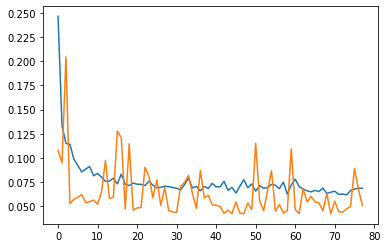

In [22]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 72)                21312     
_________________________________________________________________
dense (Dense)                (None, 36)                2628      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 24,321
Trainable params: 24,321
Non-trainable params: 0
_________________________________________________________________


In [24]:
prediction = model.predict(X_test)

In [25]:
prediction

array([[2.368649 ],
       [2.3131483],
       [2.2981482],
       [2.4827611],
       [2.3774865],
       [2.2884638],
       [2.365346 ],
       [2.0836449],
       [1.8334401],
       [1.9262106],
       [1.9524226],
       [1.8581867],
       [1.930305 ],
       [2.125495 ],
       [2.133742 ],
       [2.1144888],
       [2.2490413],
       [2.1328738],
       [2.184013 ],
       [2.2939725],
       [2.2936833],
       [2.4368036],
       [2.0921612],
       [2.0627098],
       [2.0653896],
       [2.1104867],
       [1.8589282],
       [1.7899613],
       [1.613394 ],
       [1.737766 ],
       [1.5297241],
       [1.5612822],
       [1.6011932],
       [1.6191275],
       [1.6347301],
       [1.5524509],
       [1.1242843],
       [1.5760624],
       [1.5721037],
       [1.6995475],
       [1.754853 ],
       [1.5862844],
       [1.6582568],
       [1.9702239],
       [2.1706393],
       [2.2488024],
       [2.3733542],
       [2.5654001],
       [2.4830234],
       [2.504128 ],


# Visualizing Model

In [26]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

In [27]:
X_test[0,:,:].shape

(19, 1)

In [28]:
X_, X_graph = get_lstm_data(company)

In [29]:
X_graph.iloc[20:30,0]

1299701    30.188354
1299702    30.233212
1299703    30.359703
1299704    30.666912
1299705    30.088638
1299706    29.754322
1299707    30.450064
1299708    30.314524
1299709    30.838598
1299710    31.046415
Name: adj_close, dtype: float64

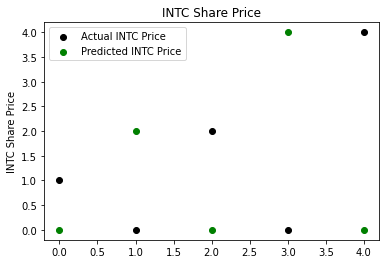

In [30]:
real = [1,0,2,0,4]
predict = [0,2,0,4,0]
another = [0,2.4, 0, 3, 0]
plt.scatter(range(len(real)), real,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(real)), predict, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [31]:
print(f"last price: {X_graph.iloc[26,0]}")
print(f"real next price: {X_graph.iloc[27,0]}")
print(f"back next price: {y_test_back[1]}")
print(f"predicted: {prediction_back[1]}")

last price: 30.4500637054443
real next price: 30.3145236968994
back next price: [30.66691208]
predicted: [30.67954]


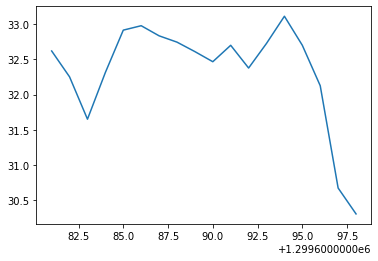

In [32]:
plt.plot(X_graph.iloc[:18,0])
#plt.scatter(range(len(y_test_back)), y_test_back,  color="black", label=f"Actual {company} Price")
#plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")

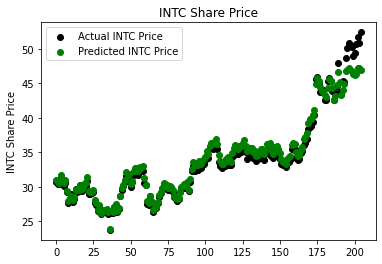

In [33]:
plt.scatter(range(len(y_test_back)), y_test_simple,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

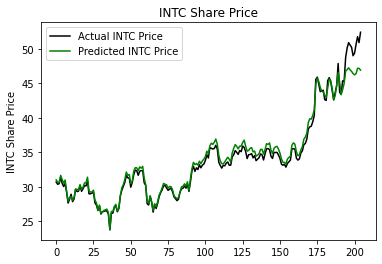

In [34]:
plt.plot(y_test_simple,  color="black", label=f"Actual {company} Price")
plt.plot(prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [35]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

2.0820882

In [36]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)

18.9677448750939